In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definindo o intervalo de datas
start_date = '2017-11-01'
end_date = '2023-11-01'

# Obtendo dados do rendimento variavel, indice IBOVESPA
ibovespa = yf.download('^BVSP', start=start_date, end=end_date)

# Obtendo dados do Bitcoin
bitcoin = yf.download('BTC-USD', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [33]:
df = ibovespa[['Open', 'Close']].copy()
df['Var'] = (df['Close'] - df['Open']) / df['Open']

valor_inicial = 1000.0
valores = []

for variacao in df['Var']:
    valor_inicial *= (1 + variacao)
    valores.append(valor_inicial)

df['Value'] = valores

valor_mensal = df['Value'].resample('M').last()
df

,Open,Close,Var,Value
Date,,,,
2017-11-01,74310.0,73824.0,-0.006540,993.459830
2017-11-03,73834.0,73915.0,0.001097,994.549711
2017-11-06,73911.0,74311.0,0.005412,999.932129
2017-11-07,74306.0,72415.0,-0.025449,974.485036
2017-11-08,72468.0,74363.0,0.026149,999.967306
...,...,...,...,...
2023-10-25,113762.0,112830.0,-0.008193,1479.899175
2023-10-26,112840.0,114777.0,0.017166,1505.302975
2023-10-27,114777.0,113301.0,-0.012860,1485.945201


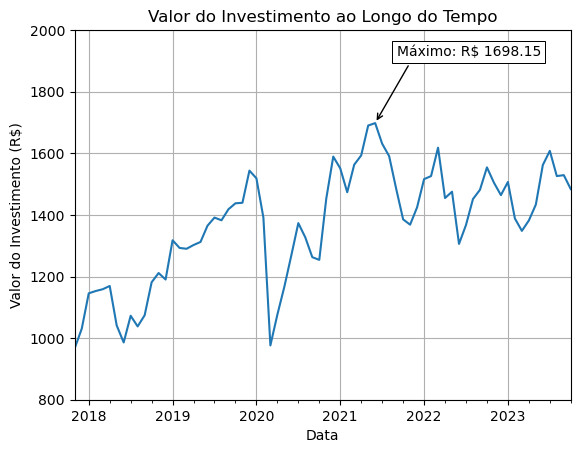

1483.833577436184


In [101]:
data_maximo = valor_mensal.idxmax()
valor_maximo = valor_mensal.max()

plt.scatter(data_maximo, valor_maximo, color='red')
def point_max(xmax, ymax, ax=None):
    text= f'Máximo: R$ {ymax:.2f}'
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

#plt.annotate(f'Máximo: R${valor_maximo:.2f}', (data_maximo, valor_maximo), textcoords="offset points", xytext=(0,10), ha='center')
point_max(data_maximo, valor_maximo)

valor_mensal.plot(kind='line')
plt.title('Valor do Investimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (R$)')

plt.ylim(800, 2000)

plt.grid(True)
plt.show()

print(valor_mensal[-1])

In [102]:
df_var = pd.DataFrame(valor_mensal)
valor_inicial = 1000.0
variacoes = []
for valor in df_var['Value']:
    variacao = (valor - valor_inicial) / 10
    variacoes.append(variacao)
    
df_var['Variacao'] = variacoes
df_var.head()
print(df_var['Variacao'][-1])

48.3833577436184


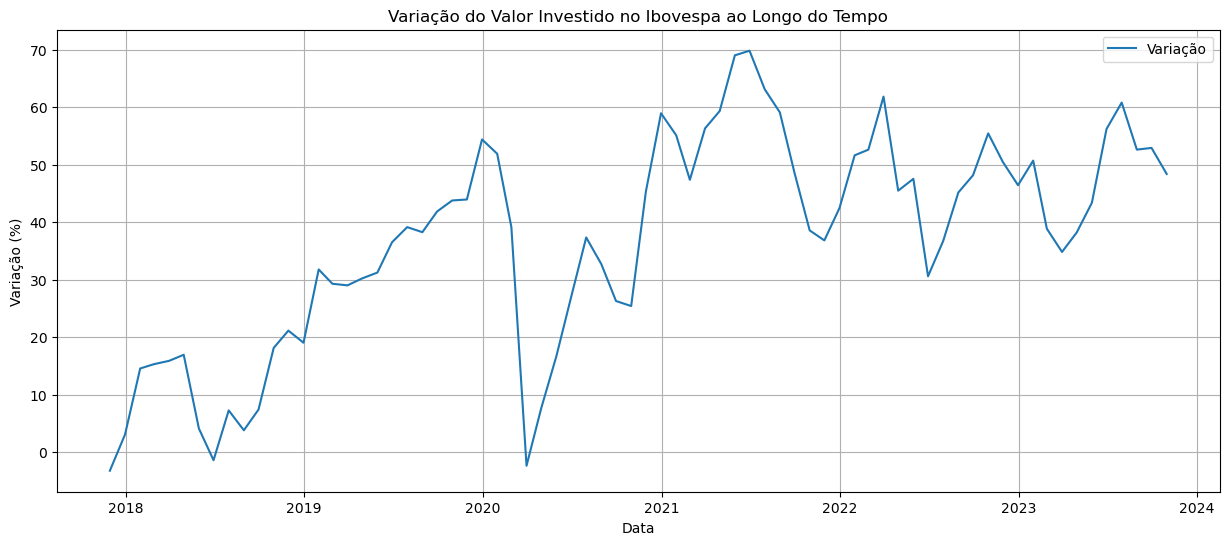

In [65]:
plt.figure(figsize=(15, 6))
plt.plot(df_var.index, df_var['Variacao'], label='Variação')
plt.title('Variação do Valor Investido no Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
fd = bitcoin[['Open', 'Close']].copy()
fd['Var'] = (fd['Close'] - fd['Open']) / fd['Open']

inicial_investment = 1000/3.73
values = []
for var in fd['Var']:
    inicial_investment *= (1+var)
    values.append(inicial_investment)
fd['Value USD'] = values

new_serie = pd.Series([1000/3.73], index=[pd.to_datetime('2017-11-29')])

btc_mensal = fd['Value USD'].resample('M').last()
s = pd.concat([new_serie, btc_mensal])
s.rename('Value')
print(s[-1]*5.0569)

6628.385810797366


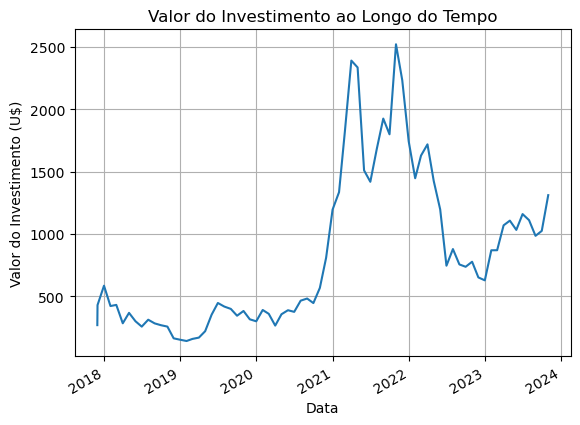

In [86]:
s.plot(kind='line')
plt.title('Valor do Investimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (U$)')
plt.grid(True)
plt.show()

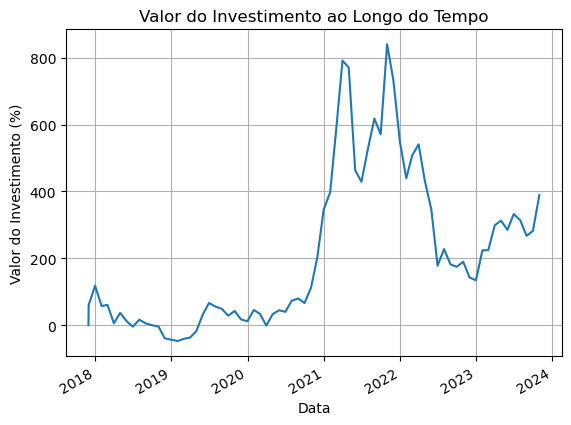

In [92]:
btc_var = pd.DataFrame(s)
initial_val = 1000.0/3.73
variation = []
for val in btc_var[0]:
    var = (val - initial_val) * 100 / initial_val
    variation.append(var)

btc_var['Variation'] = variation

btc_var['Variation'].plot(kind='line')
plt.title('Valor do Investimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (%)')
plt.grid(True)
plt.show()

2017-11-29    1000.00
2017-11-30    1009.86
2017-12-31    1019.82
2018-01-31    1029.88
2018-02-28    1040.04
               ...   
2023-06-30    1949.24
2023-07-31    1968.46
2023-08-31    1987.88
2023-09-30    2007.49
2023-10-31    2027.29
Length: 73, dtype: float64


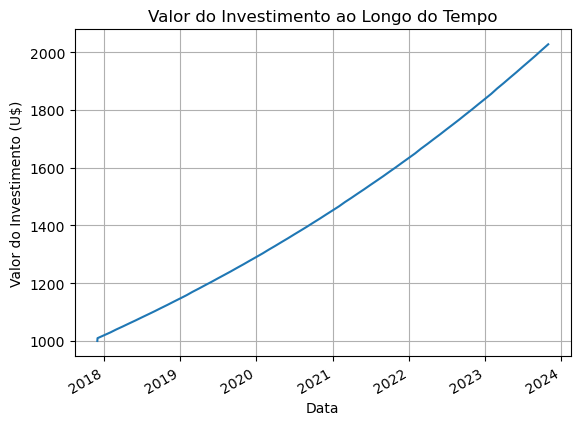

In [94]:
fixo = [
    1000.0, 1009.86, 1019.82, 1029.88, 1040.04, 1050.3, 1060.66, 1071.12, 1081.69, 1092.36, 1103.13,
    1114.01, 1125.0, 1136.1, 1147.3, 1158.62, 1170.05, 1181.59, 1193.24, 1205.01, 1216.9,
    1228.9, 1241.02, 1253.26, 1265.62, 1278.11, 1290.72, 1303.45, 1316.3, 1329.29, 1342.4,
    1355.64, 1369.01, 1382.51, 1396.15, 1409.92, 1423.83, 1437.87, 1452.05, 1466.38, 1480.84,
    1495.45, 1510.2, 1525.09, 1540.14, 1555.33, 1570.67, 1586.16, 1601.81, 1617.61, 1633.56,
    1649.67, 1665.95, 1682.38, 1698.97, 1715.73, 1732.65, 1749.74, 1767.0, 1784.43, 1802.03,
    1819.81, 1837.76, 1855.88, 1874.19, 1892.68, 1911.34, 1930.2, 1949.24, 1968.46, 1987.88,
    2007.49, 2027.29
]

f = pd.Series(fixo, index=s.index)
print(f)

f.plot(kind='line')
plt.title('Valor do Investimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (U$)')
plt.grid(True)
plt.show()

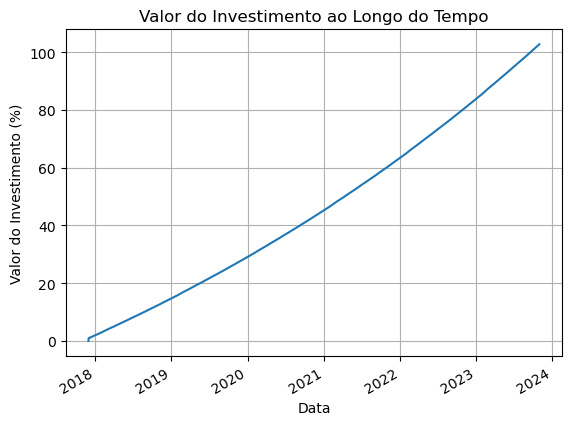

                  0      Var
2017-11-29  1000.00    0.000
2017-11-30  1009.86    0.986
2017-12-31  1019.82    1.982
2018-01-31  1029.88    2.988
2018-02-28  1040.04    4.004
...             ...      ...
2023-06-30  1949.24   94.924
2023-07-31  1968.46   96.846
2023-08-31  1987.88   98.788
2023-09-30  2007.49  100.749
2023-10-31  2027.29  102.729

[73 rows x 2 columns]


In [100]:
fixo_var = pd.DataFrame(f)
initial_val = 1000.0
variations = []

for val in fixo_var[0]:
    var = (val - initial_val) / 10
    variations.append(var)
fixo_var['Var'] = variations
fixo_var['Var'].plot(kind='line')
plt.title('Valor do Investimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor do Investimento (%)')
plt.grid(True)
plt.show()